<a href="https://www.kaggle.com/code/ericknst/titanic?scriptVersionId=100232252" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Importa os dados
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")

# Analize e exploração dos dados


In [3]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [4]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
def plotarDadosDeMortes (df,coluna, categorico=True):

    print ('\nQuantidade de valores unicos: ', df[coluna].nunique() )
    print ('\nValores unicos: ', df[coluna].nunique() )
    print ('\nValores unicos:\n', df[coluna].unique() )
    print ('\nDados faltantes: ', df[coluna].isnull().sum() )
    print ('\nDados valores:\n', df[coluna].value_counts(), )
    
    if categorico ==True:
        sns.countplot(data =df, x =coluna, hue='Survived' )
       # df.groupby('Survived')[coluna].value_counts().plot(kind='bar')
    else:
        sns.displot(df[coluna], kde=True)


Quantidade de valores unicos:  2

Valores unicos:  2

Valores unicos:
 [0 1]

Dados faltantes:  0

Dados valores:
 0    549
1    342
Name: Survived, dtype: int64


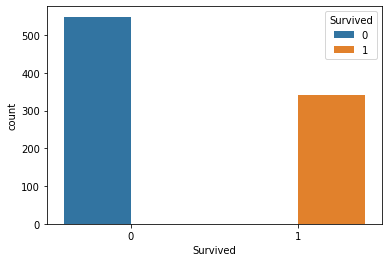

In [6]:
#quantidade de mortos
plotarDadosDeMortes(train,'Survived')


Quantidade de valores unicos:  2

Valores unicos:  2

Valores unicos:
 ['male' 'female']

Dados faltantes:  0

Dados valores:
 male      577
female    314
Name: Sex, dtype: int64


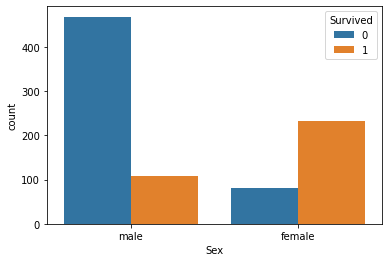

In [7]:
plotarDadosDeMortes(train,'Sex')


Quantidade de valores unicos:  3

Valores unicos:  3

Valores unicos:
 [3 1 2]

Dados faltantes:  0

Dados valores:
 3    491
1    216
2    184
Name: Pclass, dtype: int64


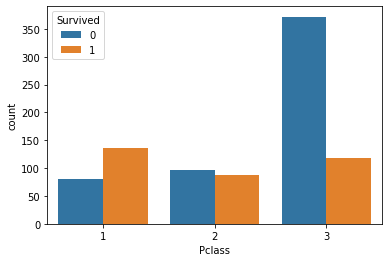

In [8]:
plotarDadosDeMortes(train,'Pclass')


Quantidade de valores unicos:  88

Valores unicos:  88

Valores unicos:
 [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]

Dados faltantes:  177

Dados valores:
 24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


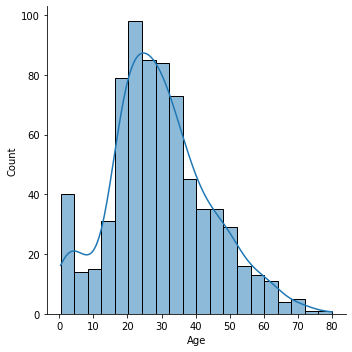

In [9]:
plotarDadosDeMortes(train,'Age',False)

# Tratamento de dados faltantes

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
#Cria uma variavel que receberá os treinamentos 
modelo = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=0)


In [12]:
#verificanco quais informaçoes existem em Sexo
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Não se deve ultilizar variaveis categorias no modelo, sendo necessario transformalas em quantitativas

In [13]:
# O comando .map aplica uma função nos meus dados linha a linha, deste modo
# O que for homen = 0 e mulher = 1

# METODO 1
#train['Sex'].map({'female:1,'male':0})

# METODO 2 
#train['Sex'].replace(['male','female'],[0,2])

#METODO 3
def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0
    
train['Sex_binario'] = train['Sex'].map(transformar_sexo)   
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

In [14]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Sex_binario  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [16]:
# Esse modelo levará em conta x = (sexo e a idade) para treinar o modelo
# e y sao os dados q desejamos prever
x = train[['Sex_binario','Age']]
y = train['Survived']

In [17]:
x.head()

,Sex_binario,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [18]:
#subistitui todos os dados faltantes por -1
x = x.fillna(-1)

In [19]:
#treina o modelo
modelo.fit(x,y)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [20]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [21]:
#É necessario aplicar o modelo nos dados de teste
x_prev =  test[['Sex_binario','Age']]
x_prev = x_prev.fillna(-1)
x_prev.head()

,Sex_binario,Age
0,0,34.5
1,1,47.0
2,0,62.0
3,0,27.0
4,1,22.0


In [22]:
p = modelo.predict(x_prev)
p

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [23]:
pd.DataFrame(data=p)

,0
0,0
1,1
2,0
3,1
4,1
...,...
413,0
414,1
415,0
416,0


In [24]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [25]:
#Converte o array em serie
pd.Series(p).head()

0    0
1    1
2    0
3    1
4    1
dtype: int64

In [26]:
# Enviar os arquivos para a competiçao do Kaggle 

# Declara o indice como o indice do passageiro
# Name muda o nome da coluna

sub = pd.Series(p,index=test['PassengerId'], name = 'Survived')

In [27]:
# o header serve para salvar a primeira linha como titulo
sub.to_csv('./primeiro_modelo.csv',header=True)

In [28]:
pd.read_csv('./primeiro_modelo.csv')

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [29]:
from sklearn.ensemble import RandomForestClassifier

#biblioteca para separação dos dados em treinamento e test
from sklearn.model_selection import train_test_split

In [30]:
# random.seed(0) define que os numeros aleatorios serão sempre uma sequencia já definida
np.random.seed(0)

# divide a variavel x em (x_treino e x_valid)
#em seguida
# divide a variavel y em (y_treino e y_valid)

# 
x_treino,x_valid,y_treino,y_valid = train_test_split(x,y,test_size=0.5)

In [31]:
x_treino.head()

,Sex_binario,Age
213,0,30.0
586,0,47.0
499,0,24.0
821,0,27.0
246,1,25.0


In [32]:
x_treino.shape,x_valid.shape

((445, 2), (446, 2))

In [33]:
modelo = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=0)
modelo.fit(x_treino,y_treino)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [34]:
p=modelo.predict(x_valid)

In [35]:
#Acuracia do modelo
np.mean(y_valid == p)

0.7690582959641256

In [36]:
# Acuracia para todas as mulheres sobreviverem
p = (x_valid['Sex_binario']==1).astype(np.int64)
np.mean(y_valid==p)

0.7825112107623319

# Validação cruzada - metodos de reamostragem


# INICIO


In [37]:
import pandas as pd
import numpy as np

In [38]:
#Importa os dados
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")
gender_submission = pd.read_csv("../input/titanic/gender_submission.csv")
primeiro_modelo = pd.read_csv("./primeiro_modelo.csv")

In [39]:
#como os dados devem estar formatados para a submissão
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [44]:
#Colocando survived na primeira coluna
train = train[[ 'Survived','PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]

In [45]:
train.corr()

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.005007,-0.338481,-0.077221,-0.035322,0.081629,0.257307
PassengerId,-0.005007,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Pclass,-0.338481,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000


In [46]:
#TRANSFORMANDO A COLUNA SEXO EM DADOS 1 e 0
def transformSexBool(sexo):
    if sexo == 'male':
        return 1
    else:
        return 0
train['SexBool'] = train['Sex'].map(transformSexBool)
test['SexBool'] = test['Sex'].map(transformSexBool)

In [47]:
train

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexBool
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,1,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,0,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,1,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [48]:
train.groupby("Pclass").count()

,Survived,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexBool
Pclass,,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214,216
2,184,184,184,184,173,184,184,184,184,16,184,184
3,491,491,491,491,355,491,491,491,491,12,491,491


In [49]:
train.groupby("Pclass").sum()

,Survived,PassengerId,Age,SibSp,Parch,Fare,SexBool
Pclass,,,,,,,
1,136,99705,7111.42,90,77,18177.4125,122
2,87,82056,5168.83,74,70,3801.8417,108
3,119,215625,8924.92,302,193,6714.6951,347


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  SexBool      891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [51]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [52]:
# transformando dados categoricos em numericos
from sklearn.preprocessing import LabelEncoder
label_cabin_encoder = LabelEncoder()
label_cabin = label_cabin_encoder.fit_transform(train.Cabin)
train['label_cabin'] = label_cabin


label_Embarked_encoder = LabelEncoder()
label_Embarked = label_Embarked_encoder.fit_transform(train.Embarked)
train['label_Embarked'] = label_Embarked


In [53]:
train.sort_values(by='Pclass') #Crescente

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexBool,label_cabin,label_Embarked
445,1,446,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S,1,10,2
310,1,311,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C,0,72,0
309,1,310,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C,0,125,0
307,1,308,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C,0,74,0
306,1,307,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C,0,147,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0,380,3,"Gustafsson, Mr. Karl Gideon",male,19.0,0,0,347069,7.7750,NaN,S,1,147,2
381,1,382,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C,0,147,0
382,0,383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,1,147,2
371,0,372,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S,1,147,2


In [54]:
train.corr()

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare,SexBool,label_cabin,label_Embarked
Survived,1.000000,-0.005007,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,-0.254888,-0.163517
PassengerId,-0.005007,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.035077,0.013083
Pclass,-0.338481,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,0.684121,0.157112
Age,-0.077221,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,-0.252331,-0.025252
SibSp,-0.035322,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,0.043593,0.066654
Parch,0.081629,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.028324,0.038322
Fare,0.257307,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,-0.503355,-0.221226
SexBool,-0.543351,0.042939,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,0.096681,0.104057
label_cabin,-0.254888,-0.035077,0.684121,-0.252331,0.043593,-0.028324,-0.503355,0.096681,1.000000,0.193205
label_Embarked,-0.163517,0.013083,0.157112,-0.025252,0.066654,0.038322,-0.221226,0.104057,0.193205,1.000000


In [55]:
train.isnull().sum()

Survived            0
PassengerId         0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
SexBool             0
label_cabin         0
label_Embarked      0
dtype: int64

In [56]:
#quais dados sao faltantes dados faltantes 
train.loc[pd.isnull(train['Age'])]
test.loc[pd.isnull(test['Age'])]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexBool
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S,1
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S,0
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C,1
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,0
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,0
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1


In [57]:
#Subistituir dados faltantes pela media
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)

In [58]:
#Subistituir dados faltantes pela media
train['Age'] = train['Age'].fillna( train['Age'].mean() )
train.isnull().sum()

Survived            0
PassengerId         0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
SexBool             0
label_cabin         0
label_Embarked      0
dtype: int64

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   PassengerId     891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             891 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           204 non-null    object 
 11  Embarked        889 non-null    object 
 12  SexBool         891 non-null    int64  
 13  label_cabin     891 non-null    int64  
 14  label_Embarked  891 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 104.5+ KB


In [60]:
treino_base = train[['PassengerId', 'Pclass', 'Age', 'SibSp','Parch', 'Fare', 'SexBool']]
valid_base = train['Survived']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
# Divide os dados em em 70% de um lado 30% do outro onde existe 
#e cada uma dessas separações são divididas em treino e validação
x_treino, x_valid, y_treino, y_valid = train_test_split( treino_base, valid_base, test_size=0.7)

In [63]:
y_treino.head()

849    1
778    0
186    1
763    1
312    0
Name: Survived, dtype: int64

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
#declara uma variavel para recever os parametros da arvore
arvore_titanic = DecisionTreeClassifier(criterion='entropy')

In [66]:
arvore_titanic.fit(x_treino,y_treino)

DecisionTreeClassifier(criterion='entropy')

In [67]:
previsoes = arvore_titanic.predict(x_valid)
previsoes

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,

In [68]:
y_valid

710    1
481    0
726    1
458    1
229    0
      ..
75     0
288    1
7      0
247    1
882    0
Name: Survived, Length: 624, dtype: int64

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(previsoes,y_valid)

0.7596153846153846

# APLICANDO NO MODELO REAL

In [70]:
#TRANSFORMANDO A COLUNA SEXO EM DADOS 1 e 0
def transformSexBool(sexo):
    if sexo == 'male':
        return 1
    else:
        return 0
train['SexBool'] = train['Sex'].map(transformSexBool)
test['SexBool'] = test['Sex'].map(transformSexBool)


#Subistituir dados faltantes pela media
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

#separa as classes que o estudo deseja ser feito
treino_base_treinamento = train[['PassengerId', 'Pclass', 'Age', 'SibSp','Parch', 'Fare', 'SexBool']]
test_base_previsao =  test[['PassengerId', 'Pclass', 'Age', 'SibSp','Parch', 'Fare', 'SexBool']]

valid_base_treinamento = train['Survived']

#aplica a arvore
from sklearn.ensemble import RandomForestClassifier
arvore_titanic = RandomForestClassifier(criterion='entropy')
arvore_titanic.fit(treino_base_treinamento,valid_base_treinamento)

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn_titanic = KNeighborsClassifier(n_neighbors=100, metric='minkowski', p = 100)
knn_titanic.fit(treino_base_treinamento,valid_base_treinamento)

#deepLearn
from sklearn.neural_network import MLPClassifier
redeNeural_Titanic = MLPClassifier(max_iter=1500, tol=0.00000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (200,200))
redeNeural_Titanic.fit(treino_base_treinamento,valid_base_treinamento)

MLPClassifier(hidden_layer_sizes=(200, 200), max_iter=1500, tol=1e-06)

In [71]:
#Verifica a acuracia dos modelos
previsoes_arvore = arvore_titanic.predict(test_base_previsao)
previsoes_knn = knn_titanic.predict(test_base_previsao)
previsoes_redeNeural = redeNeural_Titanic.predict(test_base_previsao)

from sklearn.metrics import accuracy_score
print(accuracy_score(previsoes_arvore,gender_submission['Survived']))
print(accuracy_score(previsoes_knn,gender_submission['Survived']))
print(accuracy_score(previsoes_redeNeural,gender_submission['Survived']))

0.7942583732057417
0.6435406698564593
0.6578947368421053


In [72]:
previsoes

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,

In [73]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [74]:
#pd.DataFrame(previsoes,index=gender_submission['PassengerId'])
modelo_arvore = pd.DataFrame(data=previsoes_arvore,index=gender_submission['PassengerId'], columns=['Survived'])
modelo_arvore.to_csv ('./modelo_arvore.csv')

modelo_knn = pd.DataFrame(data=previsoes_knn,index=gender_submission['PassengerId'], columns=['Survived'])
modelo_knn.to_csv ('./modelo_knn.csv')

modelo_redeNeural = pd.DataFrame(data=previsoes_redeNeural,index=gender_submission['PassengerId'], columns=['Survived'])
modelo_redeNeural.to_csv ('./modelo_redeNeural.csv')

In [75]:
modelo_knn

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,0
1307,0
